In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# HERE ARE THE CAREER OPTIONS 
correct_words = ["Doctor", "Engineer", "Teacher", "Lawyer", "Nurse", "Accountant", "Police", "Architect", "Dentist", "Pharmacist"]

In [3]:
# HERE ARE FEW MISSPELLED WORDS { YOU CAN ADD MORE WORDS IF YOU  WANT , I HAVE TAKEN ONLY 8 WORDS AND PLOTTED GRAPH ON THESE 8 WORDS }
misspelled_words = ["architache", "dactar", "nurese", "lolice", "tactor","Dentest","Deontest","Dontist"]

In [4]:
corrected_words = []

In [5]:
# HERE I AM CREATING A FUNCTION THAT WILL CREATE A VECTOR
def vectorize_word(word):
    vector = {}
    for char in word:
        if char in vector:
            vector[char] += 1
        else:
            vector[char] = 1
    return vector

In [6]:
# HERE I AM CREATING A FUNCTION FOR CALCULATING COSINE SIMILARITY
def cosine_similarity(vec1, vec2):
    all_chars = set(vec1.keys()).union(set(vec2.keys()))
    vec1_values = np.array([vec1.get(char, 0) for char in all_chars])
    vec2_values = np.array([vec2.get(char, 0) for char in all_chars])
    dot_product = np.dot(vec1_values, vec2_values)
    magnitude1 = np.sqrt(np.dot(vec1_values, vec1_values))
    magnitude2 = np.sqrt(np.dot(vec2_values, vec2_values))
    if magnitude1 * magnitude2 == 0:
        return 0.0
    else:
        return dot_product / (magnitude1 * magnitude2)

In [7]:
# HERE I AM CREATING A FUNCTION WHICH WILL CREATE LEVENSHTEIN DISTANCE 
def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1
    matrix = np.zeros((len_str1, len_str2))
    for x in range(len_str1):
        matrix[x, 0] = x
    for y in range(len_str2):
        matrix[0, y] = y
    for x in range(1, len_str1):
        for y in range(1, len_str2):
            if str1[x - 1] == str2[y - 1]:
                cost = 0
            else:
                cost = 1
            matrix[x, y] = min(matrix[x - 1, y] + 1, matrix[x, y - 1] + 1, matrix[x - 1, y - 1] + cost)
    return matrix[len_str1 - 1, len_str2 - 1]

In [8]:
for misspelled_word in misspelled_words:
    misspelled_vector = vectorize_word(misspelled_word)
    highest_similarity = 0
    most_similar_word = ""
    
    for correct_word in correct_words:
        correct_vector = vectorize_word(correct_word)
        similarity = cosine_similarity(misspelled_vector, correct_vector)
        lev_distance = levenshtein_distance(misspelled_word, correct_word.lower())
        combined_similarity = similarity / (1 + lev_distance)
        if combined_similarity > highest_similarity:
            highest_similarity = combined_similarity
            most_similar_word = correct_word
    
    corrected_words.append(most_similar_word)

In [9]:
for misspelled_word, corrected_word in zip(misspelled_words, corrected_words):
    print("Corrected word for '{}': {}".format(misspelled_word, corrected_word))


Corrected word for 'architache': Architect
Corrected word for 'dactar': Doctor
Corrected word for 'nurese': Nurse
Corrected word for 'lolice': Police
Corrected word for 'tactor': Doctor
Corrected word for 'Dentest': Dentist
Corrected word for 'Deontest': Dentist
Corrected word for 'Dontist': Dentist


In [10]:
word_frequencies = {}
for word in corrected_words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

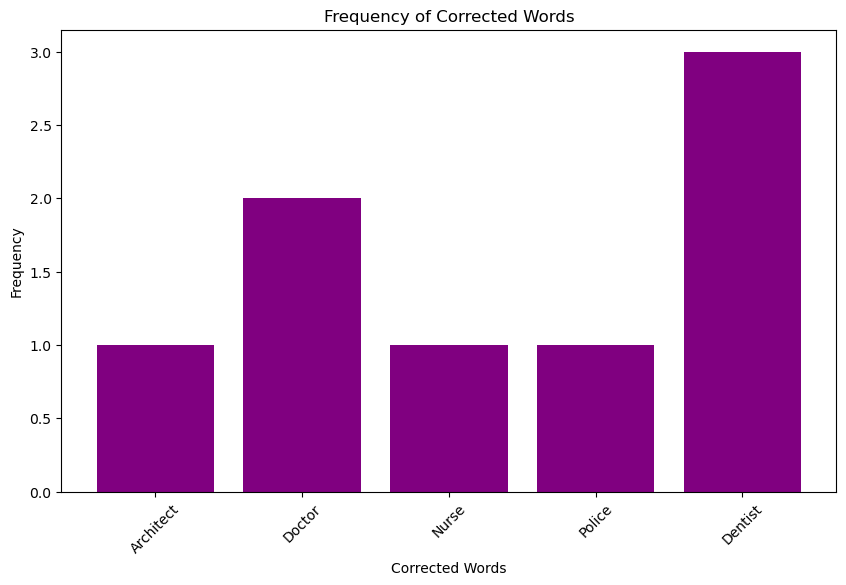

In [11]:
# HERE I AM PLOTTING THE FREQUENCY OF THE CARRIER OPTED BY THE STUDENTS 
plt.figure(figsize=(10, 6))
plt.bar(word_frequencies.keys(), word_frequencies.values(), color='PURPLE')
plt.xlabel('Corrected Words')
plt.ylabel('Frequency')
plt.title('Frequency of Corrected Words')
plt.xticks(rotation=45)
plt.show()